In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import copy
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# load modules related to this exercise
from DurableConsumptionModel import DurableConsumptionModelClass 
import estimate

import numba as nb
nb.set_num_threads(8)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
model = DurableConsumptionModelClass(name='example_negm',par={'solmethod':'negm','do_print':True})
model.precompile_numba() # solve with very coarse grids
model.solve()
model.simulate()

par = model.par
sol = model.sol
sim = model.sim

numba precompiled in 15.1 secs
 t = 29 solved in 0.1 secs
  w computed in 7.3 secs
  solved keeper problem in 0.1 secs
  solved adjuster problem in 0.0 secs
 t = 28 solved in 7.5 secs
  w computed in 7.3 secs
  solved keeper problem in 0.1 secs
  solved adjuster problem in 0.0 secs
 t = 27 solved in 14.9 secs
  w computed in 7.3 secs
  solved keeper problem in 0.1 secs
  solved adjuster problem in 0.0 secs
 t = 26 solved in 22.3 secs
  w computed in 7.3 secs
  solved keeper problem in 0.1 secs
  solved adjuster problem in 0.0 secs
 t = 25 solved in 29.7 secs
  w computed in 7.3 secs
  solved keeper problem in 0.1 secs
  solved adjuster problem in 0.0 secs
 t = 24 solved in 37.1 secs
  w computed in 7.3 secs
  solved keeper problem in 0.1 secs
  solved adjuster problem in 0.0 secs
 t = 23 solved in 44.5 secs
  w computed in 7.4 secs
  solved keeper problem in 0.1 secs
  solved adjuster problem in 0.0 secs
 t = 22 solved in 52.0 secs
  w computed in 7.3 secs
  solved keeper problem in 0.

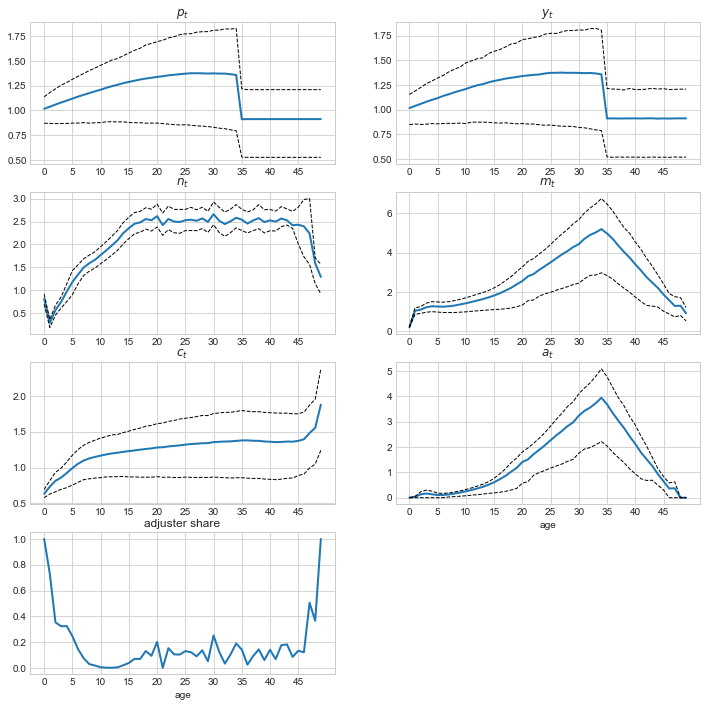

In [5]:
model.lifecycle(deciles=False)

In [ ]:
estimate.calc_moments(par,data)

In [ ]:

data = copy.copy(sim)
data.moments = estimate.calc_moments(par,data)

In [ ]:
data.moments.T

In [ ]:
Nbeta = 4
Nrho = 6

obj = np.nan + np.zeros((Nbeta,Nrho))
beta = np.linspace(0.93,0.97,Nbeta)
rho = np.linspace(1,3,Nrho)

count = 1
for i in range(Nbeta):
    for j in range(Nrho):
        print(f"{count} / {Nbeta*Nrho}")
        est_par = ['beta','rho']
        theta0 = [beta[i], rho[j]]
        obj[i,j]=estimate.sum_squared_diff_moments(theta0,model,est_par,data)
        count += 1


In [ ]:
#Re-inset the true parameters 
par.beta = copy.copy(par_beta)
par.rho = copy.copy(par_rho)

In [ ]:
#Plot figure in three dimensions

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')

# Make data.
X, Y = np.meshgrid(rho, beta)

# Plot the surface.
surf = ax.plot_surface(X, Y, obj, cmap=cm.jet)

# Customize the axis.
ax.set_xlabel(f'\u03C1')
ax.set_ylabel(f'\u03B2')
ax.set_title(f'Mehod of Simulated Moments (\u03C1,\u03B2)')
ax.set_xlim(1.0,4.0)
#ax.set_xlim(1.0,6.0)
ax.set_ylim(0.9,0.98)
ax.invert_xaxis()

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
# Plot figure in two dimensions
i_rho = abs(par_rho - rho).argmin(0) #index of rho closest to true rho
i_beta = abs(par_beta - beta).argmin(0) #index of beta closest to true beta


fig = plt.figure(figsize=(20,5))# figsize is in inches...

ax = fig.add_subplot(1,2,1)
ax.plot(beta,obj[:,i_rho])
ax.set_xlabel(f'\u03B2')
ax.set_title(f'Method of simulated moment given \u03C1 = {rho[i_rho]:.2f} ')

ax = fig.add_subplot(1,2,2)
ax.plot(rho,obj[i_beta,:])
ax.set_xlabel(f'\u03C1')
ax.set_title(f'Method of simulated moment given \u03B2 = {beta[i_beta]:.2f}')


plt.show()

In [ ]:
est_par = ['beta'] # Parameter to estimate
theta0 = [0.92] # Initial guess

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)

print(f'Objective:               {est.fun:.4f}')
print(f'beta:                    {est.x[0]:.4f}')
print(f'Number of iterartions:   {est.nit}')


In [ ]:
est_par = ['rho'] # Parameter to estimate
theta0 = [4] # Initial guess

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.rho = copy.copy(par_rho)

print(f'Objective:               {est.fun:.4f}')
print(f'rho:                     {est.x[0]:.4f}')
print(f'Number of iterartions:   {est.nit}')


In [ ]:
est_par = ['rho','beta'] # Parameters to estimate
theta0 = [4, 0.92] # Initial guesses

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)
par.rho = copy.copy(par_rho)

print(f'Objective:               {est.fun:.4f}')
print(f'rho:                     {est.x[0]:.4f}')
print(f'beta:                    {est.x[1]:.4f}')
print(f'Number of iterartions:   {est.nit}')
